In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
import warnings
warnings.filterwarnings("ignore")
    
%matplotlib inline

# 匯入資料集

In [63]:
data = pd.read_excel('C:/Users/Administrator/paper/108_recruit_train.xlsx')
data = data[data['highest_school_level']!='F']
data['highest_school_level'] = data['highest_school_level'].astype('int')
data = data.drop(['interview','second_interview','relabel'], axis=1)
data.head()

,id,sex,apply_age,marriage,highest_education,highest_graduation,loan,loan_status,military_status,aboriginal,height,weight,nationality,highest_school_level,english_level,hired_or_not
0,R224211691,F,24,0,B,Y,0,1,1,0,162,60,1,3,2.0,0
1,R223936966,F,28,0,B,Y,1,1,1,0,158,52,1,2,2.0,0
2,F228161684,F,24,0,B,Y,1,1,1,0,164,70,1,3,2.0,0
3,O200443001,F,21,0,B,Y,0,1,1,0,152,41,1,5,2.0,0
4,N225966272,F,22,0,B,I,0,1,1,0,155,45,1,6,3.0,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 0 to 1201
Data columns (total 16 columns):
id                      1188 non-null object
sex                     1188 non-null object
apply_age               1188 non-null int64
marriage                1188 non-null int64
highest_education       1188 non-null object
highest_graduation      1188 non-null object
loan                    1188 non-null int64
loan_status             1188 non-null int64
military_status         1188 non-null int64
aboriginal              1188 non-null int64
height                  1188 non-null int64
weight                  1188 non-null int64
nationality             1188 non-null int64
highest_school_level    1188 non-null int32
english_level           1188 non-null float64
hired_or_not            1188 non-null int64
dtypes: float64(1), int32(1), int64(10), object(4)
memory usage: 153.1+ KB


# 檢視資料集

,sex,hired_or_not
0,F,0.081
1,M,0.095


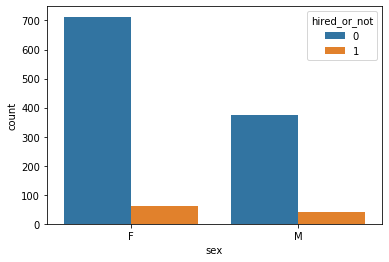

In [21]:
sns.countplot(data['sex'], hue=data['hired_or_not'])
display(data[['sex','hired_or_not']].groupby(['sex'], as_index=False).mean().round(3))

In [55]:
mask1 = data['sex'] == 'F'
mask2 = data['hired_or_not'] == 1
mask3 = data['sex'] == 'M'
mask4 = data['hired_or_not'] == 1

print("女性應徵錄取率：", len(data[(mask1 & mask2)]) / len(data[data['sex']=='F']))
print("男性應徵錄取率：", len(data[(mask3 & mask4)]) / len(data[data['sex']=='M']))
print("應徵者女男比：", len(data[data['sex']=='F'])/ len(data[data['sex']=='M']))
print("錄取者女男比：", len(data[(mask1 & mask2)]) / len(data[(mask3 & mask4)]))

女性應徵錄取率： 0.08118556701030928
男性應徵錄取率： 0.09466019417475728
應徵者女男比： 1.883495145631068
錄取者女男比： 1.6153846153846154


# 進行訓練

In [72]:
data_train = data.iloc[:,1:-1]
data_hired = data.iloc[:,-1]
data_train = pd.get_dummies(data_train)

In [76]:
data_train.head()

,apply_age,marriage,loan,loan_status,military_status,aboriginal,height,weight,nationality,highest_school_level,english_level,sex_F,sex_M,highest_education_B,highest_education_D,highest_education_M,highest_graduation_D,highest_graduation_I,highest_graduation_Y
0,24,0,0,1,1,0,162,60,1,3,2.0,1,0,1,0,0,0,0,1
1,28,0,1,1,1,0,158,52,1,2,2.0,1,0,1,0,0,0,0,1
2,24,0,1,1,1,0,164,70,1,3,2.0,1,0,1,0,0,0,0,1
3,21,0,0,1,1,0,152,41,1,5,2.0,1,0,1,0,0,0,0,1
4,22,0,0,1,1,0,155,45,1,6,3.0,1,0,1,0,0,0,1,0


In [74]:
data_hired.head()

0    0
1    0
2    0
3    0
4    0
Name: hired_or_not, dtype: int64

In [77]:
df_train, df_test, hired_train, hired_test = train_test_split(data_train, data_hired, test_size = 0.2, random_state = 0)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_logistic = sc.fit_transform(df_train)
df_test_logistic = sc.transform(df_test)

In [82]:
logistic_reg = LogisticRegression()

In [83]:
# 進行訓練
logistic_reg.fit(df_train_logistic, hired_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# 預測
logistic_pred = logistic_reg.predict(df_test_logistic)

In [85]:
# 預測機率
logistic_pred_proba = logistic_reg.predict_proba(df_test_logistic)

In [88]:
# 準確率
accuracy_score(hired_test, logistic_pred)

0.9117647058823529